In [23]:
import datetime
from pysolar.solar import get_altitude, get_azimuth
from math import sin, cos, tan , acos, asin, atan, radians, degrees ,atan2

In [24]:
RADIUS_SCALE = 1.5
HEIGHT_SCALE = 1.5
#curTime = datetime.datetime.now(datetime.timezone.utc)

# UTC+9 기준의 날짜 -> 2024년 6월 7일 15시 00분 00초
curTime = datetime.datetime(2024, 6, 7, 15, 0, 0, 0, datetime.timezone.utc) - datetime.timedelta(hours=9)

In [25]:
# 참고 사이트: https://www.suncalc.org/
def getShadowInfo(buildingLat, buildingLng, buildingHeight, curTime, isPrint=False) :
    
    altitude = get_altitude(buildingLat, buildingLng, curTime)
    azimuth = get_azimuth(buildingLat, buildingLng, curTime)

    shadowBearing = radians(azimuth-180)
    shadowUnitVector = (sin(shadowBearing), cos(shadowBearing))

    shadowLen = buildingHeight / tan(radians(altitude))

    if isPrint:
        print(f'태양 정보: [고도: {altitude}deg, 방위각: {azimuth}deg]\n')
        print(f'그림자 방위각: {shadowBearing}rad -> {shadowUnitVector}')
        print(f'그림자 길이: {shadowLen}m')

    return shadowBearing, shadowLen

In [26]:
getShadowInfo(35.88841, 128.61094, 20, curTime, True)
print()

태양 정보: [고도: 53.96223024261622deg, 방위각: 259.5573895747659deg]

그림자 방위각: 1.3885383923714767rad -> (0.9834369481466839, 0.18125056970927425)
그림자 길이: 14.551003777222954m



In [27]:
def movePosition(originLat, originLng, dist, bearingRad):
    R = 6371000

    latRad, lngRad = radians(originLat), radians(originLng)
    delta = dist / R

    movedLatRad = asin(sin(latRad) * cos(delta) + cos(latRad) * sin(delta) * cos(bearingRad))
    movedLngRad = lngRad + atan2(sin(bearingRad) * sin(delta) * cos(latRad), cos(delta) - sin(latRad) * sin(movedLatRad))

    return degrees(movedLatRad), degrees(movedLngRad)

In [28]:
# 파일 경로를 지정합니다
file_path = './경북대 노드 정보.txt'

Node = [0]*331

# 파일을 읽기 모드로 엽니다
with open(file_path, 'r', encoding='utf-8') as file:
    # 파일 전체를 읽습니다
    content = file.read()


# 노드 정보를 줄 단위로 분리합니다
lines = content.split('\n')
for i in range(len(lines)):
   if i%3 == 0 and i!=0:
    k = str(lines[i])
    
    u= k.strip('(').strip(')').split(',')

    Node[i//3] = (float(u[0]), float(u[1]))

#Node[n]  n번째 노드의 위치 정보를 담고 있음, 경도, 위도로 저장되어 있음

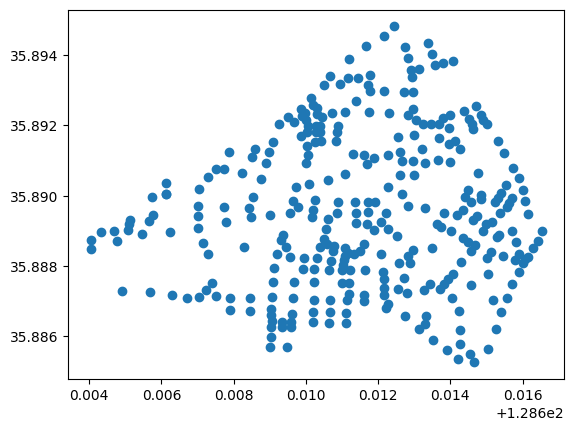

In [29]:
X = []
Y =[]
for i in range(1,331):
    X.append(Node[i][1])
    Y.append(Node[i][0])

import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,Y)
plt.show()

In [30]:
import math

def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [31]:
edge = [[] for _ in range(331)]
file_path = './경북대 간선 정보.txt'
# 파일을 읽기 모드로 엽니다
with open(file_path, 'r', encoding='utf-8') as file:
    # 파일 전체를 읽습니다
    content = file.read()

lines = content.split('\n')
for i in range(len(lines)):
    a = lines[i].split()
    edgeNum = int(a[0])
    b = a[1:]

    for j in range(len(b)):
        edge[edgeNum].append([ int(b[j]), calculate_distance(Node[edgeNum][0],Node[edgeNum][1],  Node[int(b[j])][0] , Node[int(b[j])][1]),0  ])

#edge[n]에는 n번째 노드와 연결된 노드의 정보가 담겨있음, 연결된 노드의 번호, 거리, 그 노드의 그림자정보가 들어있음

In [32]:
print(edge[1])

[[113, 0.0003425842962183924, 0], [198, 0.00040642834545379775, 0]]


In [33]:
file_path = './쉼표 넣음.csv'
# 파일을 읽기 모드로 엽니다
with open(file_path, 'r', encoding='cp949') as file:
    # 파일 전체를 읽습니다
    content = file.read()
lines = str(content).split('\n')

buildings =[]
for i in range(1, len(lines)-1):
    lines[i] = lines[i].replace('"','')
    lines[i] = lines[i].replace('\t','')
    lines[i] = lines[i].strip(',')
    lines[i] = lines[i].split(',')
    for j in range(len(lines[i])):
        lines[i][j] = lines[i][j].strip()
    if lines[i][4] != '':
        buildings.append(lines[i])

for i in range(len(buildings)):
    for j in range(2, len(buildings[i])):
        buildings[i][j] = float(buildings[i][j])
    
    buildings[i][3] *= HEIGHT_SCALE
    buildings[i][6] *= RADIUS_SCALE
    
print(buildings[1])
# building[n]에는 n번째 건물의 정보가 담겨있음, (학교명, 건물명, 면적, 높이, 위도, 경도, 반지름)

['경북대학교', '24.자연과학대학', 1338.6, 32.400000000000006, 35.890262189534084, 128.60659021651662, 30.96290733]


건물 그림 띄우기

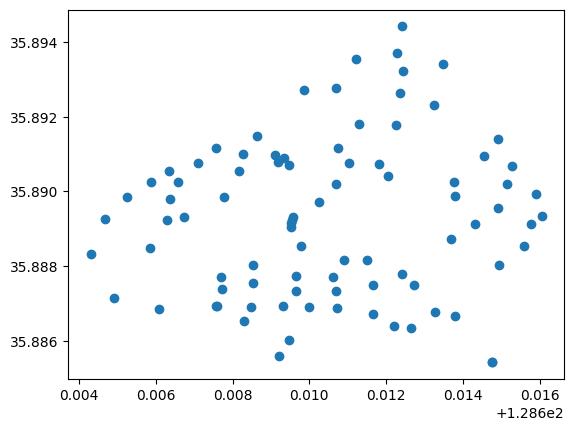

In [34]:
X = []
Y =[]
for i in range(len(buildings)):
    X.append(buildings[i][5])
    Y.append(buildings[i][4])

import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,Y)
plt.show()

In [35]:
#getShadowInfo(buildingLat, buildingLng, buildingHeight, curTime, isPrint=False) 
def BorderMaker(lat, lng, heit, radius, curTime):
    Bearing, Length = getShadowInfo(lat, lng, heit, curTime)
    (y1,x1) = movePosition(lat, lng, radius, Bearing+(np.pi/2))
    (y2,x2) = movePosition(lat, lng, radius, Bearing-(np.pi/2))
    (y3,x3) = movePosition(y1,x1,Length, Bearing )
    (y4,x4) = movePosition(y2,x2,Length, Bearing )
    l1 = ((x1,y1),(x2,y2))
    l2 = ((x1,y1),(x3,y3))
    l3 = ((x3,y3),(x4,y4))
    l4 = ((x2,y2),(x4,y4))
    return l1,l2,l3,l4



sampleBuilding = buildings[5]
l1,l2,l3,l4 = BorderMaker(sampleBuilding[4],sampleBuilding[5],sampleBuilding[3], sampleBuilding[6],curTime)
#이거 왜 찌그러짐???
    

In [36]:
#교점 찾아주는 알고리즘 
def on_segment(p, q, r):
    """ 주어진 점 q가 점 p와 r를 포함하는 선분 위에 있는지 확인 """
    if (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
        q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1])):
        return True
    return False

def orientation(p, q, r):
    """ 세 점 p, q, r의 방향을 찾습니다.
    0 -> p, q, r은 일직선 상에 있습니다.
    1 -> 시계방향
    2 -> 반시계방향 """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2

def do_intersect(p1, q1, p2, q2):
    """ 두 선분 (p1,q1)와 (p2,q2)가 교차하는지 확인 """
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # 일반적인 경우
    if o1 != o2 and o3 != o4:
        return True

    # 특수한 경우
    if o1 == 0 and on_segment(p1, p2, q1):
        return True
    if o2 == 0 and on_segment(p1, q2, q1):
        return True
    if o3 == 0 and on_segment(p2, p1, q2):
        return True
    if o4 == 0 and on_segment(p2, q1, q2):
        return True

    return False

def intersection_point(p1, q1, p2, q2):
    """ 두 선분이 교차하는 경우 교점 좌표를 계산 """
    if not do_intersect(p1, q1, p2, q2):
        return None

    # 선분 p1q1의 직선 방정식
    A1 = q1[1] - p1[1]
    B1 = p1[0] - q1[0]
    C1 = A1 * p1[0] + B1 * p1[1]

    # 선분 p2q2의 직선 방정식
    A2 = q2[1] - p2[1]
    B2 = p2[0] - q2[0]
    C2 = A2 * p2[0] + B2 * p2[1]

    determinant = A1 * B2 - A2 * B1

    if determinant == 0:
        return None  # 선분이 평행

    x = (B2 * C1 - B1 * C2) / determinant
    y = (A1 * C2 - A2 * C1) / determinant

    return (x, y)

# 예제 사용법
p1 = (1, 1)
q1 = (10, 1)
p2 = (1, 2)
q2 = (10, 2)

print(intersection_point(p1, q1, p2, q2))  # 교차하지 않음

p3 = (10, 0)
q3 = (0, 10)
p4 = (0, 0)
q4 = (10, 10)

print(intersection_point(p3, q3, p4, q4))  # 교차함

None
(5.0, 5.0)


In [37]:
def calculate_overlapping_length(segments):
    events = []
    
    # 시작점과 끝점을 이벤트로 추가
    for seg in segments:
        x1, y1 = seg[0]
        x2, y2 = seg[1]
        if x1 > x2:  # Ensure x1 is the leftmost point
            x1, x2 = x2, x1
        events.append((x1, 'start'))
        events.append((x2, 'end'))
    
    # 이벤트를 x좌표 기준으로 정렬
    events.sort()
    
    overlap_length = 0
    active_segments = 0
    previous_x = None
    
    for x, event_type in events:
        if active_segments > 0 and previous_x is not None:
            overlap_length += x - previous_x
        
        if event_type == 'start':
            active_segments += 1
        else:
            active_segments -= 1
        
        previous_x = x
    
    return overlap_length

# 예제 사용법
segments = [[(128.61487234411413, 35.889364146072694), (128.61486808398772, 35.889365697975926)], [(128.61479768356224, 35.889391343845176), (128.61479877030433, 35.88939094796057)]]
print(calculate_overlapping_length(segments))  

5.346868505284874e-06


In [38]:
#직사각형안에 간선이 들어가는지 확인하는 함수
 
def is_point_in_polygon(x, y, polygon):
    n = len(polygon)
    inside = False

    px, py = polygon[0]
    for i in range(n + 1):
        sx, sy = px, py
        px, py = polygon[i % n]
        if y > min(sy, py):
            if y <= max(sy, py):
                if x <= max(sx, px):
                    if sy != py:
                        xinters = (y - sy) * (px - sx) / (py - sy) + sx
                    if sx == px or x <= xinters:
                        inside = not inside
    return inside

def do_lines_intersect(p1, p2, q1, q2):
    def ccw(a, b, c):
        return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])

    return ccw(p1, q1, q2) != ccw(p2, q1, q2) and ccw(p1, p2, q1) != ccw(p1, p2, q2)

def isLineInTheBox(nowEdge, p1, p2, p3, p4):
    polygon = [p1, p2, p3, p4]
    (sx, sy), (ex, ey) = nowEdge

    # Check if both points of the edge are inside the polygon
    if is_point_in_polygon(sx, sy, polygon) and is_point_in_polygon(ex, ey, polygon):
        return True

    # Check if the edge intersects any of the polygon edges
    edges = [(polygon[i], polygon[(i + 1) % 4]) for i in range(4)]
    for edge in edges:
        if do_lines_intersect(nowEdge[0], nowEdge[1], edge[0], edge[1]):
            return True

    return False

In [39]:
matrix = [[[] for _ in range(331)] for _ in range(331)]


def weightUpdate(curTime):

    for i in range(len(edge)):
        stN =i
        for e in edge[i]: 
            edN = e[0]
            #경도, 위도로 배열
            stP = (Node[stN][1], Node[stN][0])
            edP = (Node[edN][1], Node[edN][0])
     
            #빌딩 선택
            #이거 계산 한 걸로 값이 있는 것과 없는 것을 쪼개서 그 건물에 대해서만 계산 하는 걸로 개선 예정...
            for building in buildings:
                l1,l2,l3,l4 = BorderMaker(building[4],building[5],building[3], building[6],curTime)
                myLines = [l1,l2,l3,l4]
                IntersetDot =[]

                #만약에 간선이 직사각형안에 들어가면 간선의 시작과 끝점을 교차지점으로 설정하고 continue
                if isLineInTheBox((stP,edP),l1[0],l1[1],l3[0],l3[1]) :
                    IntersetDot.append(stP)
                    IntersetDot.append(edP)
                    matrix[stN][edN].append(IntersetDot)
                    continue

                for myLine in myLines:
                    if do_intersect(stP, edP, myLine[0], myLine[1]):
                        dot = intersection_point(stP, edP, myLine[0], myLine[1])
                        IntersetDot.append(dot)
                        
                if len(IntersetDot) >=2:
                    matrix[stN][edN].append(IntersetDot)
                

weightUpdate(curTime)

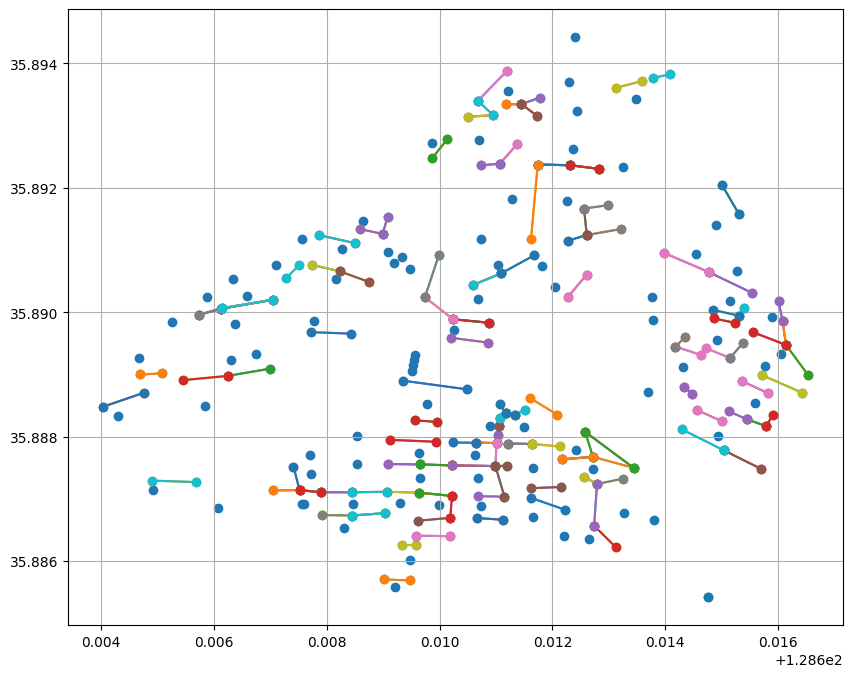

In [40]:
newWeight = [[[] for _ in range(331)] for _ in range(331)]
forPlot =[]
# print(matrix)
# for i in range(len(matrix)):
#     for j in range(len(matrix[0])):
#         newWeight[i][j] = calculate_overlapping_length(matrix[i][j])
for i in range(331):
    for j in range(331):
        if len(matrix[i][j]):
            #print(i,j,matrix[i][j])
            newWeight[i][j] = calculate_overlapping_length(matrix[i][j])
            #print(newWeight[i][j])
            forPlot.append(matrix[i][j])


plt.figure(figsize=(10, 8))

# 각 선분을 플롯
for segment in forPlot:
    for line in segment:
        x_values = [point[0] for point in line]
        y_values = [point[1] for point in line]
        plt.plot(x_values, y_values, marker='o')  # 선분을 점으로 표시

X = []
Y =[]
for i in range(len(buildings)):
    X.append(buildings[i][5])
    Y.append(buildings[i][4])


plt.scatter(X,Y)

plt.grid(True)
plt.show()

In [41]:
weightMatrix = [[-1 for _ in range(331)] for _ in range(331)]
lengthMatrix = [[-1 for _ in range(331)] for _ in range(331)]

for idx, node in enumerate(edge) :
    for e in node:
        weightMatrix[idx][e[0]] = 0
        lengthMatrix[idx][e[0]] = e[1]

for i in range(1, 331):
    for j in range(1, 331):
        if newWeight[i][j] != []:
            weightMatrix[i][j] = newWeight[i][j] / lengthMatrix[i][j]

In [42]:
with open('nodeInfo.txt', 'w') as f:
    for i in range(1, 331):
        f.write(f'{Node[i][0]},{Node[i][1]}\n')

In [43]:
with open("shadowRatio.txt", "w+") as f :
    for i in range(1, 331):
        for j in range(1, 331):
            f.write(str(weightMatrix[i][j]) + " ")
        f.write("\n")

In [44]:
preScale =0
for  i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if len(matrix[i][j]) !=0 :
            preScale +=1
print(preScale)

220
